In [7]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Exemplo de textos em português
texts = [
    "Este é um exemplo de texto para análise.",
    "Este é outro exemplo de texto.",
    "Bag of Words e TF-IDF são técnicas de NLP.",
    "Análise de similaridade de texto com NLP.",
    "NLP é importante para processamento de linguagem natural."
]

# Criando um DataFrame para facilitar a manipulação
df = pd.DataFrame(texts, columns=['Texto'])

# Pré-processamento básico
df['Texto'] = df['Texto'].str.lower()
df['Texto'] = df['Texto'].str.replace('[^\w\s]', '', regex=True)

# Representação Bag of Words
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(df['Texto'])

# Representação TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Texto'])

# Função para calcular similaridade
def calculate_similarity(matrix, metric='cosine'):
    if metric == 'cosine':
        return cosine_similarity(matrix)
    elif metric == 'euclidean':
        return 1 / (1 + euclidean_distances(matrix))

# Calculando similaridades com BoW
bow_cosine_sim = calculate_similarity(bow_matrix, metric='cosine')
bow_euclidean_sim = calculate_similarity(bow_matrix, metric='euclidean')

# Calculando similaridades com TF-IDF
tfidf_cosine_sim = calculate_similarity(tfidf_matrix, metric='cosine')
tfidf_euclidean_sim = calculate_similarity(tfidf_matrix, metric='euclidean')

# Criando um DataFrame para cada métrica de similaridade
bow_cosine_df = pd.DataFrame(bow_cosine_sim, index=df['Texto'], columns=df['Texto'])
tfidf_cosine_df = pd.DataFrame(tfidf_cosine_sim, index=df['Texto'], columns=df['Texto'])



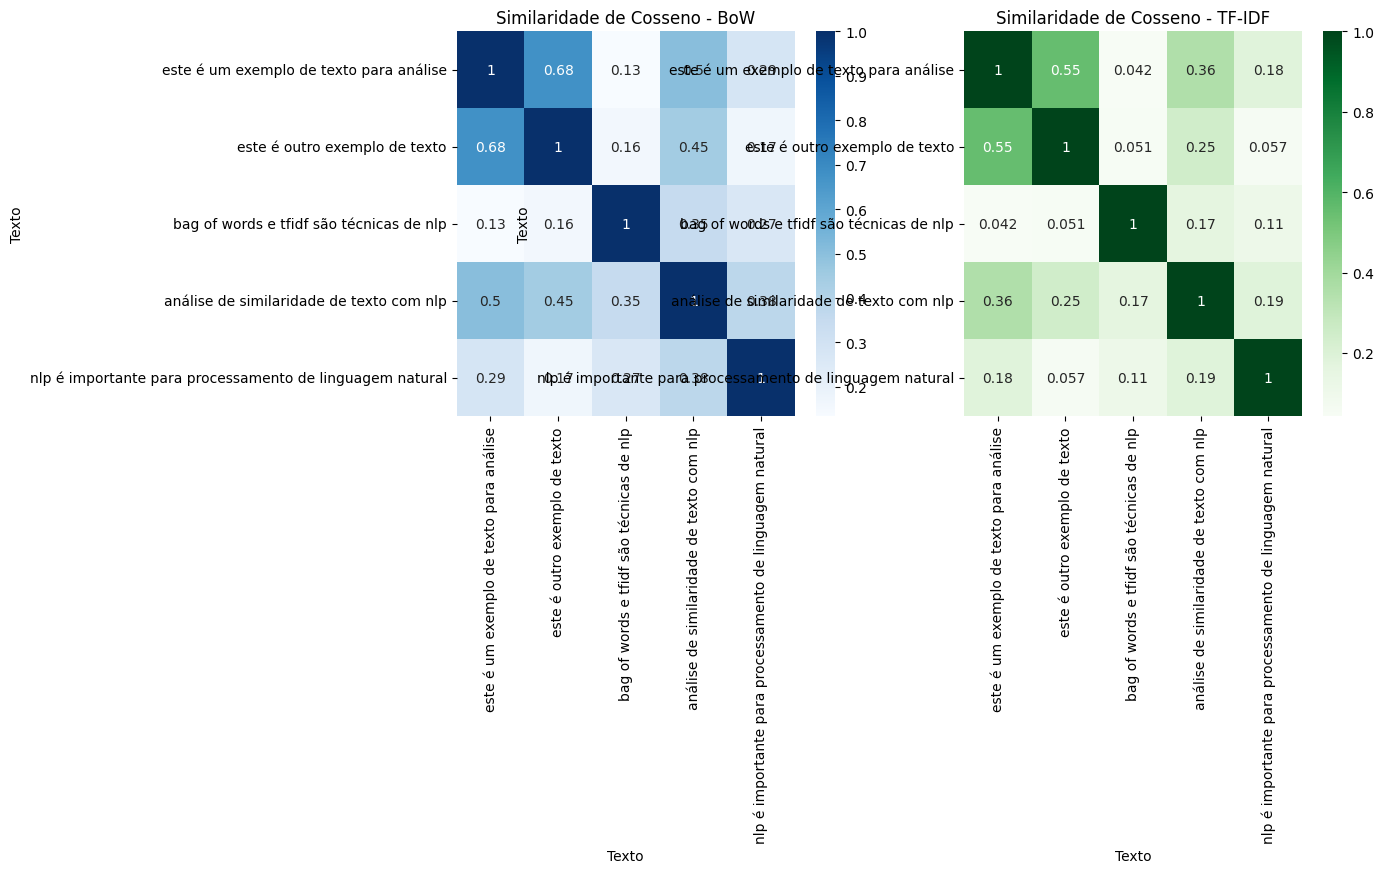

In [8]:
# 1. Heatmaps para Visualização das Similaridades

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(bow_cosine_df, annot=True, cmap="Blues", cbar=True)
plt.title("Similaridade de Cosseno - BoW")
plt.subplot(1, 2, 2)
sns.heatmap(tfidf_cosine_df, annot=True, cmap="Greens", cbar=True)
plt.title("Similaridade de Cosseno - TF-IDF")
plt.show()



In [9]:
# 2. Quadro Comparativo de Similaridade de Cosseno entre BoW e TF-IDF

comparison_cosine_df = pd.DataFrame({
    "Texto 1": np.repeat(df['Texto'].values, len(df)),
    "Texto 2": np.tile(df['Texto'].values, len(df)),
    "Similaridade BoW (Cosseno)": bow_cosine_sim.flatten(),
    "Similaridade TF-IDF (Cosseno)": tfidf_cosine_sim.flatten()
})

# Exibindo o quadro comparativo de cosseno
print("\nQuadro Comparativo de Similaridade de Cosseno entre BoW e TF-IDF:")
print(comparison_cosine_df)




Quadro Comparativo de Similaridade de Cosseno entre BoW e TF-IDF:
                                              Texto 1  \
0             este é um exemplo de texto para análise   
1             este é um exemplo de texto para análise   
2             este é um exemplo de texto para análise   
3             este é um exemplo de texto para análise   
4             este é um exemplo de texto para análise   
5                       este é outro exemplo de texto   
6                       este é outro exemplo de texto   
7                       este é outro exemplo de texto   
8                       este é outro exemplo de texto   
9                       este é outro exemplo de texto   
10           bag of words e tfidf são técnicas de nlp   
11           bag of words e tfidf são técnicas de nlp   
12           bag of words e tfidf são técnicas de nlp   
13           bag of words e tfidf são técnicas de nlp   
14           bag of words e tfidf são técnicas de nlp   
15           análise 

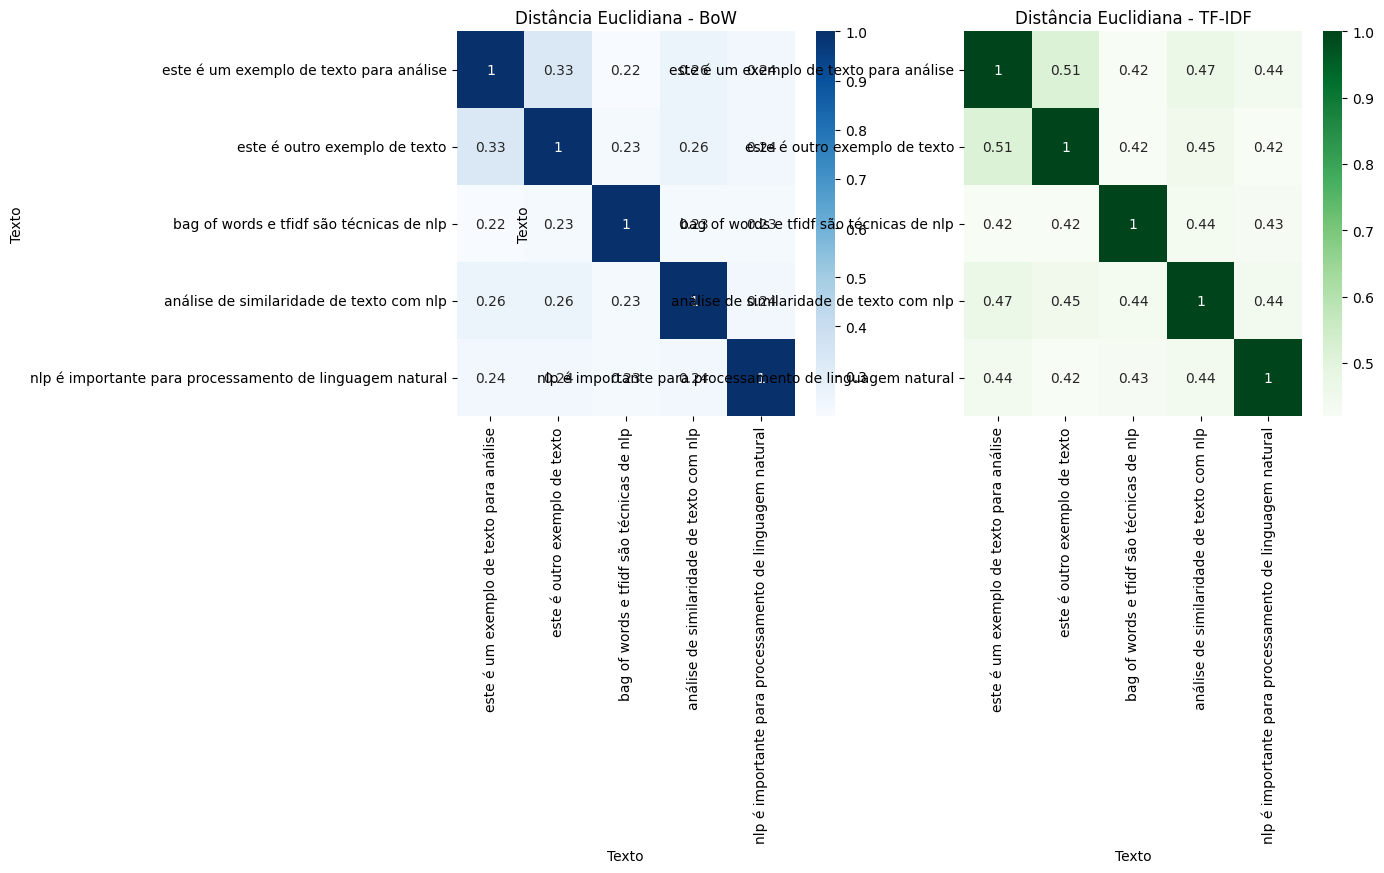

In [10]:
# 3. Análise Gráfica da Distância Euclidiana

# Convertendo as matrizes em DataFrames para visualização
bow_euclidean_df = pd.DataFrame(bow_euclidean_sim, index=df['Texto'], columns=df['Texto'])
tfidf_euclidean_df = pd.DataFrame(tfidf_euclidean_sim, index=df['Texto'], columns=df['Texto'])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(bow_euclidean_df, annot=True, cmap="Blues", cbar=True)
plt.title("Distância Euclidiana - BoW")
plt.subplot(1, 2, 2)
sns.heatmap(tfidf_euclidean_df, annot=True, cmap="Greens", cbar=True)
plt.title("Distância Euclidiana - TF-IDF")
plt.show()



In [11]:
# 4. Quadro Comparativo de Distância Euclidiana entre BoW e TF-IDF

comparison_euclidean_df = pd.DataFrame({
    "Texto 1": np.repeat(df['Texto'].values, len(df)),
    "Texto 2": np.tile(df['Texto'].values, len(df)),
    "Distância BoW (Euclidiana)": bow_euclidean_sim.flatten(),
    "Distância TF-IDF (Euclidiana)": tfidf_euclidean_sim.flatten()
})

# Exibindo o quadro comparativo de distância euclidiana
print("\nQuadro Comparativo de Distância Euclidiana entre BoW e TF-IDF:")
print(comparison_euclidean_df)



Quadro Comparativo de Distância Euclidiana entre BoW e TF-IDF:
                                              Texto 1  \
0             este é um exemplo de texto para análise   
1             este é um exemplo de texto para análise   
2             este é um exemplo de texto para análise   
3             este é um exemplo de texto para análise   
4             este é um exemplo de texto para análise   
5                       este é outro exemplo de texto   
6                       este é outro exemplo de texto   
7                       este é outro exemplo de texto   
8                       este é outro exemplo de texto   
9                       este é outro exemplo de texto   
10           bag of words e tfidf são técnicas de nlp   
11           bag of words e tfidf são técnicas de nlp   
12           bag of words e tfidf são técnicas de nlp   
13           bag of words e tfidf são técnicas de nlp   
14           bag of words e tfidf são técnicas de nlp   
15           análise de 